In [12]:
import numpy as np
# Importing Pandas Library 
import pandas as pd
import matplotlib.pyplot as plt
from preprocessing import *
import os
import joblib
from sklearn.preprocessing import MinMaxScaler
from utils import *

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Activation, Reshape, Concatenate

from models.EEGNet import *

from sklearn.metrics import confusion_matrix

from preprocessing import *

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
label_name = [
    'eyebrows', 
    'left',
    'right',
    'both',
    'teeth'
]
models = []
scalers = {}

for label in label_name:
    _model = load_model(rf'./pipeline_{label}/checkpoints/checkpoint.keras')
    _model.trainable = True
    _model = Model(inputs=_model.input, outputs=_model.layers[-4].output, name=label)
    print(_model.summary())
    models.append(_model)

    scalers[label] = joblib.load(rf'./pipeline_{label}/checkpoints/scaler.save')

Model: "eyebrows"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4, 128, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 4, 128, 16)     │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 4, 128, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 1, 128, 48)     │           192 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 128, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1, 128, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 1, 32, 48)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 32, 48)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d                │ (None, 1, 32, 16)      │         1,536 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 32, 16)      │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1, 32, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 1, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,848 (11.12 KB)

 Trainable params: 2,688 (10.50 KB)

 Non-trainable params: 160 (640.00 B)

None


Model: "left"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4, 128, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 4, 128, 32)     │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 4, 128, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 1, 128, 96)     │           384 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 128, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1, 128, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 1, 32, 96)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 32, 96)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d                │ (None, 1, 32, 32)      │         4,608 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 32, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1, 32, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 1, 4, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,232 (28.25 KB)

 Trainable params: 6,912 (27.00 KB)

 Non-trainable params: 320 (1.25 KB)

None


Model: "right"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4, 128, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 4, 128, 10)     │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 4, 128, 10)     │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 1, 128, 20)     │            80 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 128, 20)     │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1, 128, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 1, 32, 20)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 32, 20)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d                │ (None, 1, 32, 10)      │           520 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 32, 10)      │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1, 32, 10)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 1, 4, 10)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 40)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,160 (4.53 KB)

 Trainable params: 1,080 (4.22 KB)

 Non-trainable params: 80 (320.00 B)

None


Model: "both"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4, 128, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 4, 128, 16)     │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 4, 128, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 1, 128, 48)     │           192 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 128, 48)     │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1, 128, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 1, 32, 48)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 32, 48)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d                │ (None, 1, 32, 16)      │         1,536 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 32, 16)      │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1, 32, 16)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 1, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,848 (11.12 KB)

 Trainable params: 2,688 (10.50 KB)

 Non-trainable params: 160 (640.00 B)

None


Model: "teeth"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2, 128, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 2, 128, 25)     │         1,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2, 128, 25)     │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 1, 128, 100)    │           200 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1, 128, 100)    │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 1, 128, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 1, 32, 100)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 32, 100)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d                │ (None, 1, 32, 25)      │         4,100 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1, 32, 25)      │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1, 32, 25)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 1, 4, 25)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 4, 25)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,150 (24.02 KB)

 Trainable params: 5,850 (22.85 KB)

 Non-trainable params: 300 (1.17 KB)

None


In [15]:
inputs = []
input_shape = {
    'teeth': (2, 128, 1),
    'left': (4, 128, 1),
    'right': (4, 128, 1),
    'eyebrows': (4, 128, 1),
    'both': (4, 128, 1),
}
for label in label_name:
    inputs.append(
        Input(shape=input_shape[label], name=f"{label} input")
    )

In [16]:
outs = []
for i in range(len(label_name)):
    model = models[i]
    input = inputs[i]

    outs.append(model(input))

x = Concatenate()(outs)
x = Dense(128*6, activation='relu')(x)
x = Reshape((128, 6))(x)
x = Activation('softmax', name = 'softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.summary()

model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ eyebrows input      │ (None, 4, 128, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ left input          │ (None, 4, 128, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ right input         │ (None, 4, 128, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ both input          │ (None, 4, 128, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ teeth input         │ (None, 2, 128, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ eyebrows            │ (None, 64)        │      2,848 │ eyebrows          │
│ (Functional)        │                   │            │ input[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ left (Functional)   │ (None, 128)       │      7,232 │ left input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ right (Functional)  │ (None, 40)        │      1,160 │ right input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ both (Functional)   │ (None, 64)        │      2,848 │ both input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ teeth (Functional)  │ (None, 100)       │      6,150 │ teeth input[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 396)       │          0 │ eyebrows[0][0],   │
│ (Concatenate)       │                   │            │ left[0][0],       │
│                     │                   │            │ right[0][0],      │
│                     │                   │            │ both[0][0],       │
│                     │                   │            │ teeth[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 768)       │    304,896 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 128, 6)    │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ softmax             │ (None, 128, 6)    │          0 │ reshape_1[0][0]   │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 325,134 (1.24 MB)

 Trainable params: 324,114 (1.24 MB)

 Non-trainable params: 1,020 (3.98 KB)

In [17]:
raw_data = {}
trial_num = 10
for label in label_name:
    raw_data[label] = {}
    for trial in range(1, trial_num + 1):
        raw_data[label][len(raw_data[label])] = [
            rf'./raw_data/{label}/{label}_{trial}.csv',
            rf'./roi_v2/{label}/{label}_{trial}.csv'
        ]
    
raw_data

{'eyebrows': {0: ['./raw_data/eyebrows/eyebrows_1.csv',
   './roi_v2/eyebrows/eyebrows_1.csv'],
  1: ['./raw_data/eyebrows/eyebrows_2.csv',
   './roi_v2/eyebrows/eyebrows_2.csv'],
  2: ['./raw_data/eyebrows/eyebrows_3.csv',
   './roi_v2/eyebrows/eyebrows_3.csv'],
  3: ['./raw_data/eyebrows/eyebrows_4.csv',
   './roi_v2/eyebrows/eyebrows_4.csv'],
  4: ['./raw_data/eyebrows/eyebrows_5.csv',
   './roi_v2/eyebrows/eyebrows_5.csv'],
  5: ['./raw_data/eyebrows/eyebrows_6.csv',
   './roi_v2/eyebrows/eyebrows_6.csv'],
  6: ['./raw_data/eyebrows/eyebrows_7.csv',
   './roi_v2/eyebrows/eyebrows_7.csv'],
  7: ['./raw_data/eyebrows/eyebrows_8.csv',
   './roi_v2/eyebrows/eyebrows_8.csv'],
  8: ['./raw_data/eyebrows/eyebrows_9.csv',
   './roi_v2/eyebrows/eyebrows_9.csv'],
  9: ['./raw_data/eyebrows/eyebrows_10.csv',
   './roi_v2/eyebrows/eyebrows_10.csv']},
 'left': {0: ['./raw_data/left/left_1.csv', './roi_v2/left/left_1.csv'],
  1: ['./raw_data/left/left_2.csv', './roi_v2/left/left_2.csv'],
  2: ['

In [18]:
filters = {
    'left': filter_left,
    'right': filter_right,
    'both': filter_both,
    'teeth': filter_teeth,
    'eyebrows': filter_eyebrows,
}

In [19]:
dataset = {}
num = 1
drop_cols = {
    'left': [],
    'right': [],
    'both': [],
    'teeth': ['AF7', 'AF8'],
    'eyebrows': [],
}
for label_ in raw_data:
    data, label = process_raw_record_20_features(raw_data[label_])

    dataset[label_] = {}
    temp_data, temp_label = create_dataset_20_features(data, label, filters, scalers, epsilon=0.2)
    print(temp_data.shape, temp_label.shape)
    temp_label[temp_label == 1] = num
    num += 1

    temp_data, temp_label = unison_shuffled_copies(temp_data, temp_label)
    temp_data = temp_data[:35000]
    temp_label = temp_label[:35000]
    train_idx = int(temp_data.shape[0] * 0.8)
    dataset[label_]['train_data'] = temp_data[:train_idx]
    dataset[label_]['train_label'] = temp_label[:train_idx]
    dataset[label_]['test_data'] = temp_data[train_idx:]
    dataset[label_]['test_label'] = temp_label[train_idx:]

    print(
        label_, 
        dataset[label_]['train_data'].shape,
        dataset[label_]['train_label'].shape,
        dataset[label_]['test_data'].shape,
        dataset[label_]['test_label'].shape,
        sep=' --- '
    )

(48132, 128, 18) (48132, 128)
eyebrows --- (28000, 128, 18) --- (28000, 128) --- (7000, 128, 18) --- (7000, 128)
(35383, 128, 18) (35383, 128)
left --- (28000, 128, 18) --- (28000, 128) --- (7000, 128, 18) --- (7000, 128)
(35607, 128, 18) (35607, 128)
right --- (28000, 128, 18) --- (28000, 128) --- (7000, 128, 18) --- (7000, 128)
(46126, 128, 18) (46126, 128)
both --- (28000, 128, 18) --- (28000, 128) --- (7000, 128, 18) --- (7000, 128)
(47038, 128, 18) (47038, 128)
teeth --- (28000, 128, 18) --- (28000, 128) --- (7000, 128, 18) --- (7000, 128)


In [20]:
train_x = []
train_y = []
test_x = []
test_y = []

for label in dataset:
    train_x.append(dataset[label]['train_data'])
    train_y.append(dataset[label]['train_label'])
    test_x.append(dataset[label]['test_data'])
    test_y.append(dataset[label]['test_label'])

train_x = np.concatenate(train_x)
train_y = np.concatenate(train_y)
test_x = np.concatenate(test_x)
test_y = np.concatenate(test_y)

In [21]:
train_x = train_x.transpose((0, 2, 1))
test_x = test_x.transpose((0, 2, 1))

train_x = np.expand_dims(train_x, axis=-1)
test_x = np.expand_dims(test_x, axis=-1)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

train_x, train_y = unison_shuffled_copies(train_x, train_y)

(140000, 18, 128, 1) (140000, 128) (35000, 18, 128, 1) (35000, 128)


In [22]:
np.savez_compressed(
    'train.npz', 
    train_x=train_x, 
    train_y=train_y, 
    test_x=test_x, 
    test_y=test_y
)

In [23]:
loaded_data = np.load('train.npz')
train_x = loaded_data['train_x']
train_y = loaded_data['train_y']
test_x = loaded_data['test_x']
test_y = loaded_data['test_y']

In [24]:
train_x.shape

(140000, 18, 128, 1)

In [25]:
history = model.fit(
    [
        train_x[:, :4], 
        train_x[:, 4:8], 
        train_x[:, 8:12],
        train_x[:, 12:16],
        train_x[:, 16:18]
    ], 
    train_y,
    epochs=15,
    validation_data=(
        [
            test_x[:, :4], 
            test_x[:, 4:8], 
            test_x[:, 8:12],
            test_x[:, 12:16],
            test_x[:, 16:18]
        ],
        test_y
    ),
)

Epoch 1/15


I0000 00:00:1728372234.857192   71493 service.cc:146] XLA service 0x77676c001670 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728372234.857233   71493 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-10-08 14:23:54.929450: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-08 14:23:55.261776: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  27/4375 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.4339 - loss: 1.6638

I0000 00:00:1728372240.490182   71493 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4374/4375 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9107 - loss: 0.2759

W0000 00:00:1728372276.918945   71491 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert
W0000 00:00:1728372279.208580   71493 assert_op.cc:38] Ignoring Assert operator compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert


4375/4375 ━━━━━━━━━━━━━━━━━━━━ 47s 9ms/step - accuracy: 0.9107 - loss: 0.2759 - val_accuracy: 0.9537 - val_loss: 0.1296
Epoch 2/15
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.9474 - loss: 0.1506 - val_accuracy: 0.9563 - val_loss: 0.1176
Epoch 3/15
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.9487 - loss: 0.1451 - val_accuracy: 0.9558 - val_loss: 0.1197
Epoch 4/15
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step - accuracy: 0.9502 - loss: 0.1409 - val_accuracy: 0.9448 - val_loss: 0.1665
Epoch 5/15
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 37s 9ms/step - accuracy: 0.9508 - loss: 0.1380 - val_accuracy: 0.9582 - val_loss: 0.1110
Epoch 6/15
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.9514 - loss: 0.1355 - val_accuracy: 0.9591 - val_loss: 0.1101
Epoch 7/15
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 36s 8ms/step - accuracy: 0.9517 - loss: 0.1349 - val_accuracy: 0.9486 - val_loss: 0.1520
Epoch 8/15
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step - accuracy: 0.9523 - loss: 0.1329 - val

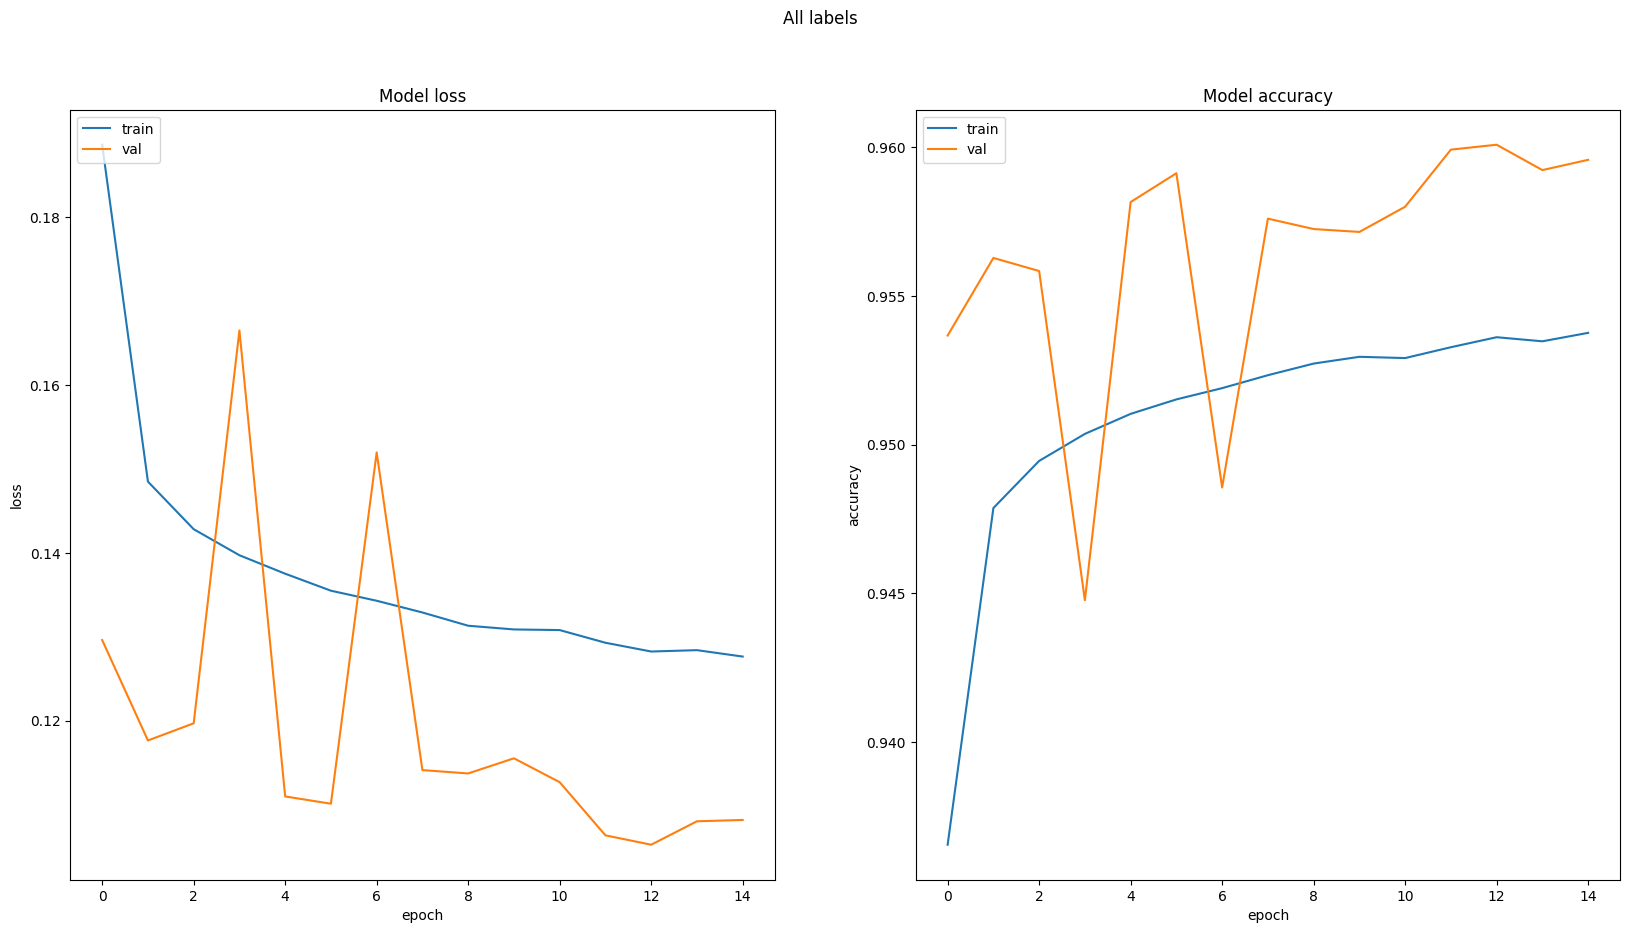

In [26]:
plt.figure(figsize=(20, 10)).suptitle("All labels")
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')


In [27]:
y_pred = model.predict([
    test_x[:, :4], 
    test_x[:, 4:8], 
    test_x[:, 8:12],
    test_x[:, 12:16],
    test_x[:, 16:20]
])
y_true = test_y
y_pred = np.argmax(y_pred, 2)


cm_total = np.zeros((6, 6))

for y_t, y_p in zip(y_true, y_pred):
    cm = confusion_matrix(y_t, y_p, labels=[0, 1, 2, 3, 4, 5])
    cm = np.array(cm)
    cm_total = cm_total + cm


result = []
for cls in range(6):
    tp = cm_total[cls, cls]
    fn = np.sum(np.delete(cm_total[cls, :], cls))
    fp = np.sum(np.delete(cm_total[:, cls], cls))
    tn = np.delete(cm_total, cls, axis=0)
    tn = np.sum(np.delete(tn, cls, axis=1))

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = (2 * precision * recall) / (precision + recall)
    acc = (tp + tn) / (tp + fn + tn + fp)
    specifity = tn/(tn+fp)

    result.append([precision, recall, f1, acc, specifity])

result = np.array(result)

1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [28]:
print(f'precision, recall, f1, acc, specifity\n{result}')

precision, recall, f1, acc, specifity
[[0.96807977 0.97356416 0.97081422 0.9596933  0.92902507]
 [0.94321928 0.94903852 0.94611995 0.99615179 0.99789099]
 [0.92481981 0.9677711  0.94580807 0.98874598 0.99111487]
 [0.96654581 0.92172979 0.94360597 0.99002143 0.99682272]
 [0.92993573 0.88419676 0.90648964 0.99059866 0.99638019]
 [0.93434138 0.8735142  0.90290449 0.99394241 0.99795481]]


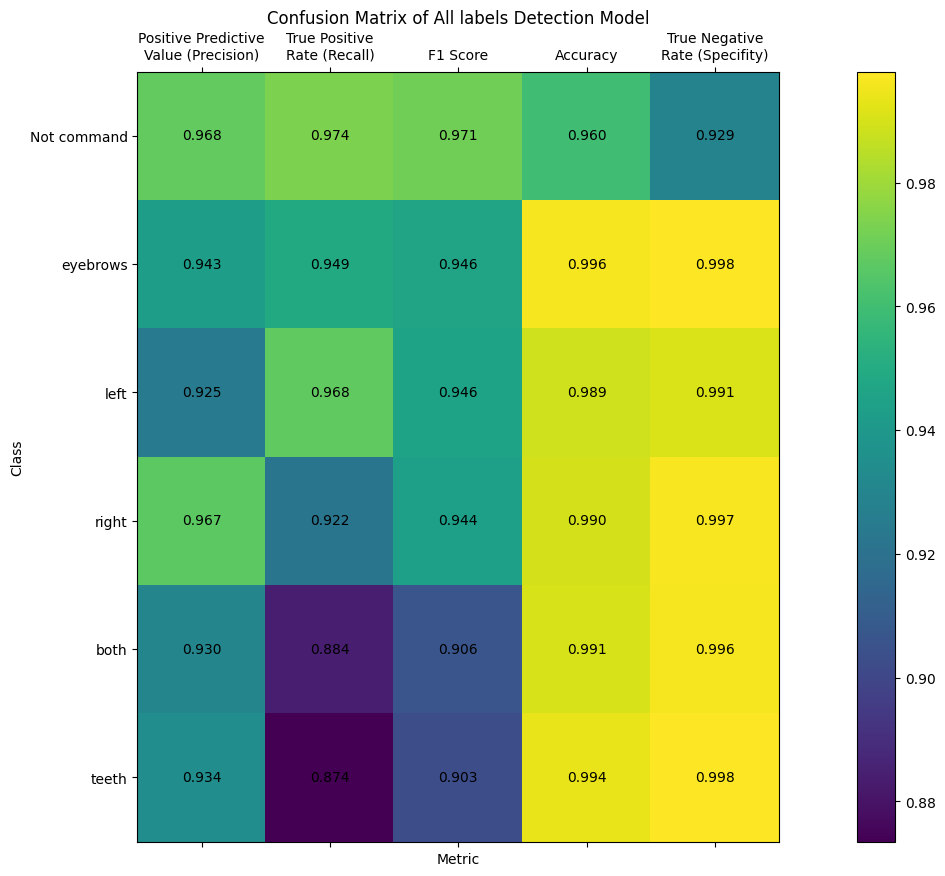

In [29]:
plt.figure(figsize=(20, 10))
plt.title("Confusion Matrix of All labels Detection Model")
plt.matshow(result, fignum=False)
plt.xticks([0, 1, 2, 3, 4], ['Positive Predictive\nValue (Precision)', 'True Positive\nRate (Recall)', 'F1 Score', 'Accuracy', 'True Negative\nRate (Specifity)'])
plt.yticks([0, 1, 2, 3, 4, 5], ['Not command', 'eyebrows', 'left', 'right', 'both', 'teeth'])
plt.xlabel("Metric")
plt.ylabel("Class")
for (i, j), z in np.ndenumerate(result):
    plt.text(j, i, '{:0.3f}'.format(z), ha='center', va='center')
plt.colorbar()

In [30]:
model.save(r'./checkpoints/orthogonal_2.keras')